In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install geopandas
!pip install folium
!pip install seaborn
!pip install geopy
!pip install turfpy
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import pandas as pd     
import numpy as np
import requests
import geopandas as gpd   
import matplotlib.pyplot as plt    
import seaborn as sns   
import folium
from folium import Marker
from folium.plugins import MarkerCluster, HeatMap
from geopy.geocoders import Nominatim
from os import path

In [ ]:
filepath = '/content/drive/MyDrive/omdena-poland/task-1-dataset/PL_2018_20200213.csv'
lucas_df = pd.read_csv(filepath)
print(lucas_df.shape)
lucas_df.head()

(23087, 97)


<ipython-input-4-6da64800aa0d>:2: DtypeWarning: Columns (0,32) have mixed types. Specify dtype option on import or set low_memory=False.
  lucas_df = pd.read_csv(filepath)


,POINT_ID,NUTS0,NUTS1,NUTS2,NUTS3,TH_LAT,TH_LONG,OFFICE_PI,EX_ANTE,SURVEY_DATE,...,SOIL_BLK_20_30_TAKEN,STANDARD_SAMPLE,SOIL_STD_TAKEN,ORGANIC_SAMPLE,SOIL_ORG_DEPTH_CANDO,PHOTO_POINT,PHOTO_NORTH,PHOTO_EAST,PHOTO_SOUTH,PHOTO_WEST
0,52143064,PL,PL8,PL82,PL822,49.999992,22.523955,0.0,0.0,02/08/18,...,8.0,0.0,8.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0
1,52143116,PL,PL8,PL81,PL812,50.459587,22.647285,0.0,0.0,29/09/18,...,8.0,0.0,8.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0
2,52143388,PL,PL8,PL84,PL842,52.859583,23.344372,0.0,0.0,27/06/18,...,8.0,0.0,8.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0
3,52143474,PL,PL8,PL84,PL841,53.616991,23.584724,0.0,0.0,09/05/18,...,8.0,1.0,1.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0
4,47923082,PL,PL5,PL51,PL517,50.656433,16.670903,0.0,0.0,22/08/18,...,8.0,0.0,8.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unique_LC1_code = lucas_df['LC1'].unique()
unique_LC1_code

array(['B16', 'E20', 'C10', 'B14', 'C22', 'B13', 'A30', 'C32', 'C33',
       'E10', 'A11', 'B19', 'A22', 'B32', 'E30', 'B12', 'B18', 'B11',
       'B22', 'D10', 'B75', 'C31', 'B35', 'B15', 'H11', 'A21', 'C21',
       'Bx1', 'F40', 'B21', 'G11', 'Bx2', 'F20', 'B33', 'D20', 'B73',
       'B31', 'B51', 'B52', 'B41', 'B71', 'B54', 'B43', 'B23', 'C23',
       'B55', 'B84', 'B74', 'A12', 'H12', 'B45', 'B53', 'A13', 'G21',
       'B44', 'B37', 'B72', 'B36', 'F30', 'F10', '8', 'B83', 'G12', 'B42',
       'B34', nan], dtype=object)

In [ ]:
LUCAS_CODE = {
    'B11': 'Common wheat',
    'B12': 'Durum wheat', 
    'B13': 'Barley',
    'B14': 'Rye',
    'B15': 'Oats',
    'B16': 'Maize',
    'B18': 'Triticale',
    'B19': 'Other cereals',
    'B21': 'Potatoes',
    'B22': 'Sugar beet',
    'B23': 'Other root crops',
    'B31': 'Sunflower',
    'B32': 'Rape and turnip rape',
    'B33': 'Soya',
    'B34': 'Cotton',
    'B35': 'Other fibre and oleaginous crops',
    'B36': 'Tobacco',
    'B37': 'Other non-permanent industrial crops',
    'B41': 'Dry pulses',
    'B42': 'Tomatoes',
    'B43': 'Other fresh vegetables',
    'B44': 'Floriculture and ornamental plants',
    'B45': 'Strawberries',
    'B51': 'Clovers',
    'B52': 'Lucerne',
    'B53': 'Other leguminous and mixtures for fodder',
    'B54': 'Mix of cereals for fodder',
    'B55': 'Temporary grassland',
    'B71': 'Apple fruit',
    'B72': 'Pear fruit',
    'B73': 'Cherry fruit',
    'B74': 'Nuts trees',
    'B75': 'Other fruit trees and berries',
    'B83': 'Nurseries',
    'B84': 'Permanent industrial crops',
    'Bx1': 'unknown',
    'Bx2': 'unknown',   
}

In [ ]:
# WARNING: this takes a while
# The get data fuction takes a really long time to run as it get the state, and county value for over 5000 points
# There might be ways to improve this code cell and make it faster 
# lucas_df.info()
#Function to filter the croplands and get a certain cropland cover percentage
def get_crops(df):
  indexes_to_drop = []
  for ind in df.index:
    if len(df['LC1'][ind])!=0:
      if df['LC1'][ind][0]!='B': # CROP
        indexes_to_drop.append(ind)
  #drop unwanted rows using their index
  df.drop(df.index[indexes_to_drop], inplace=True)
  #extra filtering process to reduce the number of points
  df = df[df['LC1_PERC']>=70] # 70% coverage
  df = df[df['LU1']=='U111'] # Agriculture
  return df

#Function to get the county, and state features of the lat and long points
def get_location(lat, lon):
    url = f'https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json&accept-language=en&zoom=11'
    try:
        result = requests.get(url=url)
        result_json = result.json()
        return result_json
        # return result_json['address']['state'], result_json['address']['county']
    except:
        return None

def get_data(df):
  columns = ['TH_LAT', 'TH_LONG', 'LC1', 'LC1_PERC', 'LU1', 'LU1_PERC', 'POINT_ID']
  df = lucas_df[columns]
  df = df.dropna()
  df = get_crops(df)

  state_result = []
  county_result = []
  lat_result = []
  lon_result = []
  lc1_result = []
  id_result = []
  for ind, row in df.iterrows():
    lat = str(row['TH_LAT'])
    lon = str(row['TH_LONG'])
    result = get_location(str(row['TH_LAT']), str(row['TH_LONG']))
    if result is not None:
      id_result.append(row['POINT_ID'])
      lat_result.append(lat)
      lon_result.append(lon)
      state_result.append(result['address']['state'])
      #Some counties are saved in city key value
      try:
        county_result.append(result['address']['county'])
      except:
        county_result.append(result['address']['city'])
      lc1_result.append(row['LC1'])
  
  final_df = pd.DataFrame(list(zip(id_result, lat_result, lon_result, county_result, state_result,lc1_result)),
               columns =['POINT_ID','LAT', 'LON', 'COUNTY', 'STATE','LC1'])


  return final_df

In [ ]:
from os import path
from google.colab import files
path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/cropland.csv'

if path.exists(path_file):
  # load
  df = pd.read_csv(path_file,index_col=0)
else:
  # create
  df = get_data(lucas_df)
  with open(path_file, 'w', encoding='utf-8-sig') as f:
    df.to_csv(f)

print(df.shape)
df.head()

(4884, 6)


,POINT_ID,LAT,LON,COUNTY,STATE,LC1
0,52143064,49.999992,22.523955,Przeworsk County,Subcarpathian Voivodeship,B16
1,49383126,50.910954,18.796913,Kłobuck County,Silesian Voivodeship,B13
2,49403006,49.838734,18.626611,Cieszyn County,Silesian Voivodeship,B16
3,49403232,51.853363,19.010255,Poddębice County,Łódzkie Voivodship,B14
4,46083314,52.858948,14.263596,Gryfino County,West Pomeranian Voivodeship,B16


In [ ]:
#Using exhaustive map() dict
df['LC1']=df['LC1'].map(LUCAS_CODE)
df.head()

,POINT_ID,LAT,LON,COUNTY,STATE,LC1
0,52143064,49.999992,22.523955,Przeworsk County,Subcarpathian Voivodeship,Maize
1,49383126,50.910954,18.796913,Kłobuck County,Silesian Voivodeship,Barley
2,49403006,49.838734,18.626611,Cieszyn County,Silesian Voivodeship,Maize
3,49403232,51.853363,19.010255,Poddębice County,Łódzkie Voivodship,Rye
4,46083314,52.858948,14.263596,Gryfino County,West Pomeranian Voivodeship,Maize


In [ ]:
path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/cropland_with_target_plain.csv'
if path.exists(path_file):
  print('file already exists')
else:
  with open(path_file, 'w', encoding='utf-8-sig') as f:
    df.to_csv(f)

In [ ]:
# Load shape file
shapefile_all = gpd.read_file("/content/drive/MyDrive/omdena-poland/task-1-dataset/pl_10km.shp")
# change CRS to epsg 4326
shapefile_all_transformed = shapefile_all.to_crs(epsg=4326)
print(shapefile_all_transformed.crs)
shapefile_all_transformed.tail()

EPSG:4326


,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
4042,10kmE532N315,5320000,3150000,"POLYGON ((24.20789 50.58535, 24.23500 50.67329..."
4043,10kmE532N316,5320000,3160000,"POLYGON ((24.23500 50.67329, 24.26224 50.76123..."
4044,10kmE532N317,5320000,3170000,"POLYGON ((24.26224 50.76123, 24.28961 50.84915..."
4045,10kmE532N318,5320000,3180000,"POLYGON ((24.28961 50.84915, 24.31711 50.93706..."
4046,10kmE532N319,5320000,3190000,"POLYGON ((24.31711 50.93706, 24.34474 51.02496..."


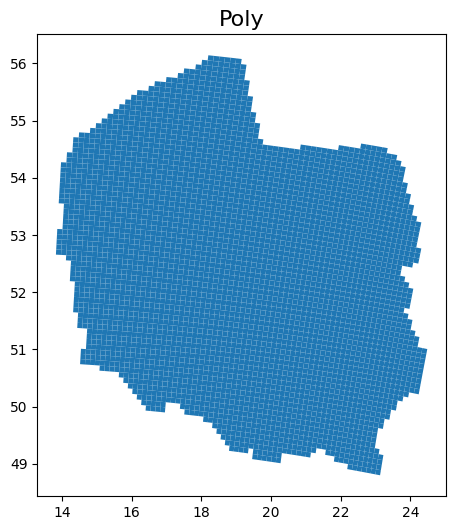

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Poly", fontsize=16)
poly = shapefile_all_transformed.plot(ax=ax)
plt.show()

In [ ]:
df['STATE'].value_counts()

Lublin Voivodeship                 525
Łódzkie Voivodship                 426
Greater Poland Voivodeship         409
Opole Voivodeship                  401
Podlaskie Voivodeship              380
Masovian Voivodeship               370
Lower Silesian Voivodeship         360
Kuyavian-Pomeranian Voivodeship    360
Warmian-Masurian Voivodeship       330
Silesian Voivodeship               253
West Pomeranian Voivodeship        227
Świętokrzyskie Voivodeship         216
Subcarpathian Voivodeship          184
Lesser Poland Voivodeship          184
Pomeranian Voivodeship             147
Lubusz Voivodeship                 112
Name: STATE, dtype: int64

In [ ]:
# m_2 = folium.Map([lat, long], tiles='cartodbpositron', zoom_start=7)
m_2 = folium.Map(location=[df.LAT.mean(), df.LON.mean()], tiles='cartodbpositron',
                 zoom_start=6, 
                 control_scale=True)

# # Your code here: Add a heatmap to the map
HeatMap(data=df[['LAT', 'LON']], radius=5).add_to(m_2)

m_2


!




In [ ]:
#We will be focusing on the two major zones as seen on our map, OPOLE and HOLY CROSS VOIVODESHIP (STATE)
# print(df['STATE'].unique()) 
#'Opole Voivodeship'
#'Świętokrzyskie Voivodeship'

opole_df = df[df['STATE']=='Opole Voivodeship']
holy_cross_df = df[df['STATE']=='Świętokrzyskie Voivodeship']

print(opole_df.shape, holy_cross_df.shape)

(401, 6) (216, 6)


In [ ]:
#Markers in opole state

m_3 = folium.Map(location=[opole_df.LAT.mean(), opole_df.LON.mean()],
                 zoom_start=9, 
                 control_scale=True)

for idx, row in opole_df.iterrows():
  Marker([row['LAT'], row['LON']]).add_to(m_3)

m_3.fit_bounds([opole_df.LAT.mean(), opole_df.LON.mean()])

m_3

In [ ]:
#Markers in Holy Cross state

m_4 = folium.Map(location=[holy_cross_df.LAT.mean(), holy_cross_df.LON.mean()], 
                 zoom_start=9, 
                 control_scale=True)

for idx, row in holy_cross_df.iterrows():
  Marker([row['LAT'], row['LON']]).add_to(m_4)

m_4.fit_bounds([holy_cross_df.LAT.mean(), holy_cross_df.LON.mean()])

m_4

In [ ]:
opole_df['COUNTY'].value_counts()

Nysa County                53
Głubczyce County           43
Olesno County              42
Kluczbork County           38
Kędzierzyn-Koźle County    38
Namysłów County            37
Prudnik County             35
Strzelce County            31
Brzeg County               30
Opole County               28
Krapkowice County          21
Opole                       5
Name: COUNTY, dtype: int64

In [ ]:
holy_cross_df['COUNTY'].value_counts()

Jędrzejów County       65
Opatów County          45
Włoszczowa County      21
Pińczów County         20
Ostrowiec County       14
Kielce County          10
Busko County            9
Starachowice County     7
Końskie County          7
Kazimierza County       7
Sandomierz County       6
Staszów County          4
Kielce                  1
Name: COUNTY, dtype: int64

In [ ]:
#Markers in opole

m_5 = folium.Map(location=[opole_df.LAT.mean(), opole_df.LON.mean()], tiles="Stamen Terrain",
                 zoom_start=9, 
                 control_scale=True)

fmc = MarkerCluster()
for idx, row in opole_df.iterrows():
    if not math.isnan(row['LON']) and not math.isnan(row['LAT']):
        fmc.add_child(folium.Marker([row['LAT'], row['LON']]))

m_5.add_child(fmc)

HeatMap(data=opole_df[['LAT', 'LON']], radius=5).add_to(m_5)

m_5.fit_bounds([opole_df.LAT.mean(), opole_df.LON.mean()])

m_5

In [ ]:
#Markers in holy cross county

m_6 = folium.Map(location=[holy_cross_df.LAT.mean(), holy_cross_df.LON.mean()], tiles="Stamen Terrain",
                 zoom_start=9, 
                 control_scale=True)

fmc = MarkerCluster()
for idx, row in holy_cross_df.iterrows():
    if not math.isnan(row['LON']) and not math.isnan(row['LAT']):
        fmc.add_child(folium.Marker([row['LAT'], row['LON']]))

m_6.add_child(fmc)

HeatMap(data=holy_cross_df[['LAT', 'LON']], radius=5).add_to(m_6)

m_6.fit_bounds([holy_cross_df.LAT.mean(), holy_cross_df.LON.mean()])

m_6

**Get points on Shapefile**

In [ ]:
print(len(opole_df), len(holy_cross_df))
print(shapefile_all_transformed.crs)
print(len(shapefile_all_transformed))
shapefile_all_transformed.tail()

401 216
EPSG:4326
4047


,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
4042,10kmE532N315,5320000,3150000,"POLYGON ((24.20789 50.58535, 24.23500 50.67329..."
4043,10kmE532N316,5320000,3160000,"POLYGON ((24.23500 50.67329, 24.26224 50.76123..."
4044,10kmE532N317,5320000,3170000,"POLYGON ((24.26224 50.76123, 24.28961 50.84915..."
4045,10kmE532N318,5320000,3180000,"POLYGON ((24.28961 50.84915, 24.31711 50.93706..."
4046,10kmE532N319,5320000,3190000,"POLYGON ((24.31711 50.93706, 24.34474 51.02496..."


In [ ]:
# shapefile_all_transformed['EOFORIGIN'].unique()
print(shapefile_all_transformed['geometry'][0])

POLYGON ((13.829501555648427 52.65765635908251, 13.837347859278308 52.747377579776455, 13.985236864414588 52.74254505468579, 13.977089674117572 52.65283514106149, 13.829501555648427 52.65765635908251))


In [ ]:
opole_df.head()

,POINT_ID,LAT,LON,COUNTY,STATE,LC1
46,48443104,50.808165,17.434341,Brzeg County,Opole Voivodeship,Maize
54,48763050,50.295841,17.805317,Głubczyce County,Opole Voivodeship,Common wheat
61,48523068,50.479147,17.495529,Nysa County,Opole Voivodeship,Common wheat
62,48583142,51.134656,17.688312,Namysłów County,Opole Voivodeship,Common wheat
69,48543138,51.102689,17.625498,Namysłów County,Opole Voivodeship,Common wheat


In [ ]:
opole_gdf = gpd.GeoDataFrame(
    opole_df, geometry=gpd.points_from_xy(opole_df.LON, opole_df.LAT))

holy_cross_gdf = gpd.GeoDataFrame(
    holy_cross_df, geometry=gpd.points_from_xy(holy_cross_df.LON, holy_cross_df.LAT))

opole_gdf = opole_gdf.set_crs('epsg:4326')
holy_cross_gdf = holy_cross_gdf.set_crs('epsg:4326')

print(len(opole_gdf), len(holy_cross_gdf))
# opole_gdf.head()
print(opole_gdf.crs)

401 216
epsg:4326


In [ ]:
print(opole_gdf.crs)
hc_gdf = gpd.sjoin(holy_cross_gdf,shapefile_all_transformed,how="inner", predicate='within')
op_gdf = gpd.sjoin(opole_gdf,shapefile_all_transformed,how="inner", predicate='within')

hc_gdf.shape, op_gdf.shape

epsg:4326


((216, 11), (401, 11))

In [ ]:
%%script echo skipping
# cannot handle cyrillic alphabet (replaced by '?')
op_gdf = op_gdf.rename(columns ={'index_right':'10km_index'})
op_gdf.to_file("/content/drive/MyDrive/omdena-poland/data/geodataframe_lucas_opole.shp")

skipping


In [ ]:
try:
  shp_path2 ="/content/drive/MyDrive/omdena-poland/data/subset_4326_shapefile.shp"
  sf2 = gpd.read_file(shp_path2)
except:
  print(subset_4326_shapefile.shp, "doesn't exist. Run first Shared_Fields_Segment_Anything_clean_mask_to_shapefile.ipynb to create it.")

LUCAS_points_in_subset = gpd.sjoin(opole_gdf,sf2,how="inner", predicate='within')
path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/LUCAS_points_in_subset_4326_dataframe.csv'
if path.exists(path_file):
  print("file already exists")
else:
  with open(path, 'w', encoding='utf-8-sig') as f:
    LUCAS_points_in_subset.to_csv(f)
LUCAS_points_in_subset = LUCAS_points_in_subset.to_crs(32633)
LUCAS_points_in_subset['LON_32633'] = LUCAS_points_in_subset.geometry.values.x
LUCAS_points_in_subset['LAT_32633'] = LUCAS_points_in_subset.geometry.values.y
LUCAS_points_in_subset = LUCAS_points_in_subset.drop(columns=['geometry'])
print(LUCAS_points_in_subset)
path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/LUCAS_points_in_subset_32633_dataframe.csv'
if path.exists(path_file):
  print("file already exists")
else:
  with open(path, 'w', encoding='utf-8-sig') as f:
    LUCAS_points_in_subset.to_csv(f)

      POINT_ID        LAT        LON            COUNTY              STATE  \
2052  48843034  50.145247  17.893165  Głubczyce County  Opole Voivodeship   
3047  48843032  50.127385  17.890194  Głubczyce County  Opole Voivodeship   
3389  48883034  50.141369  17.948848  Głubczyce County  Opole Voivodeship   

               LC1  index_right  FID      LON_32633     LAT_32633  
2052       unknown            0    0  706703.703726  5.558788e+06  
3047  Common wheat            0    0  706568.382196  5.556794e+06  
3389    Sugar beet            0    0  710698.423362  5.558513e+06  


In [ ]:
hc_gdf.head()

,POINT_ID,LAT,LON,COUNTY,STATE,LC1,geometry,index_right,CELLCODE,EOFORIGIN,NOFORIGIN
130,50583098,50.520341,20.432195,Pińczów County,Świętokrzyskie Voivodeship,Rye,POINT (20.43220 50.52034),2679,10kmE505N309,5050000,3090000
184,50603092,50.464475,20.448226,Pińczów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.44823 50.46447),2679,10kmE505N309,5050000,3090000
469,50583094,50.484800,20.424259,Pińczów County,Świętokrzyskie Voivodeship,Barley,POINT (20.42426 50.48480),2679,10kmE505N309,5050000,3090000
903,50523090,50.456877,20.332561,Pińczów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.33256 50.45688),2679,10kmE505N309,5050000,3090000
1815,50523096,50.510200,20.344357,Pińczów County,Świętokrzyskie Voivodeship,Dry pulses,POINT (20.34436 50.51020),2679,10kmE505N309,5050000,3090000


In [ ]:
type(hc_gdf['geometry'])

geopandas.geoseries.GeoSeries

In [ ]:
hc_gdf['index_right'].value_counts()

2556    10
3109    10
3169    10
2494     9
2679     8
        ..
2802     1
2745     1
2435     1
2498     1
2683     1
Name: index_right, Length: 79, dtype: int64

In [ ]:
op_gdf = op_gdf.rename(columns ={'10km_index':'index_right'})
op_gdf['index_right'].value_counts()

1609    11
1611    10
1681     9
1680     8
1402     8
        ..
1131     1
1678     1
1336     1
1200     1
1538     1
Name: index_right, Length: 99, dtype: int64

In [ ]:
max_opole = op_gdf[op_gdf['index_right']==1609]
max_opole

,POINT_ID,LAT,LON,COUNTY,STATE,LC1,geometry,index_right,CELLCODE,EOFORIGIN,NOFORIGIN
462,48903032,50.121560,17.973684,Głubczyce County,Opole Voivodeship,Common wheat,POINT (17.97368 50.12156),1609,10kmE488N303,4880000,3030000
467,48823032,50.129313,17.862359,Głubczyce County,Opole Voivodeship,unknown,POINT (17.86236 50.12931),1609,10kmE488N303,4880000,3030000
1708,48843038,50.180972,17.899116,Głubczyce County,Opole Voivodeship,Sugar beet,POINT (17.89912 50.18097),1609,10kmE488N303,4880000,3030000
1714,48903034,50.139420,17.976686,Głubczyce County,Opole Voivodeship,unknown,POINT (17.97669 50.13942),1609,10kmE488N303,4880000,3030000
2052,48843034,50.145247,17.893165,Głubczyce County,Opole Voivodeship,unknown,POINT (17.89317 50.14525),1609,10kmE488N303,4880000,3030000
3047,48843032,50.127385,17.890194,Głubczyce County,Opole Voivodeship,Common wheat,POINT (17.89019 50.12738),1609,10kmE488N303,4880000,3030000
3056,48883038,50.177090,17.954841,Głubczyce County,Opole Voivodeship,unknown,POINT (17.95484 50.17709),1609,10kmE488N303,4880000,3030000
3063,48903030,50.103700,17.970685,Głubczyce County,Opole Voivodeship,Sugar beet,POINT (17.97068 50.10370),1609,10kmE488N303,4880000,3030000
3389,48883034,50.141369,17.948848,Głubczyce County,Opole Voivodeship,Sugar beet,POINT (17.94885 50.14137),1609,10kmE488N303,4880000,3030000
3704,48823038,50.182902,17.871251,Głubczyce County,Opole Voivodeship,Common wheat,POINT (17.87125 50.18290),1609,10kmE488N303,4880000,3030000


In [ ]:
max_opole_to_save = max_opole.copy()
max_opole_to_save= max_opole_to_save.rename(columns ={'index_right':'10km_index'})
path_file = "/content/drive/MyDrive/omdena-poland/data/geodataframe_lucas_10km_max_opole.shp"
if path.exists(path_file):
  print("file already exists")
else:
  max_opole_to_save.to_file()

In [ ]:
from google.colab import files
# df.to_csv('cropland.csv')
# files.download('cropland.csv')

path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/max_opole.csv'
if path.exists(path_file):
  print("file already exists")
else:
  with open(path, 'w', encoding='utf-8-sig') as f:
    max_opole.to_csv(f)

In [ ]:
lat_point_list = max_opole[['LAT']].values.flatten() # before flatten: (11, 1)
lon_point_list = max_opole[['LON']].values.flatten()

max_lat_point, min_lat_point = max(lat_point_list), min(lat_point_list)
max_lon_point, min_lon_point = max(lon_point_list), min(lon_point_list)

points = [] #lon_lat_list = [[4.373352367, 52.091372156], [4.373360755, 52.091365819], [4.373384852, 52.091347618], [4.373410766, 52.091360632], [4.37337828, 52.09138517], [4.373352367, 52.091372156]]
for cnt, extreme in enumerate([max_lat_point, max_lon_point,min_lat_point, min_lon_point]):
  try:
    index_extreme = np.where(lat_point_list==extreme)[0][0]
  except:
    index_extreme = np.where(lon_point_list==extreme)[0][0]
  point = [lon_point_list[index_extreme],lat_point_list[index_extreme]]    
  points.append(point)
points.append(points[-1])


In [ ]:
from shapely.geometry import Polygon
polygon_geom = Polygon(points)
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])
path_file = '/content/drive/MyDrive/omdena-poland/task-1-dataset/new_aoi.shp'
if path.exists(path_file):
  print("file already exists")
else:
  with open(path, 'w', encoding='utf-8-sig') as f:
    polygon.to_file(filename=path_file, driver="ESRI Shapefile")      

In [ ]:
polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#print(polygon.centroid)
centroid_lon = polygon.centroid.x.values[0]
centroid_lat = polygon.centroid.y.values[0]

<ipython-input-41-a67e0347a002>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_lon = polygon.centroid.x.values[0]
<ipython-input-41-a67e0347a002>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_lat = polygon.centroid.y.values[0]


In [ ]:
%%script echo skipping
m_pol = folium.Map([50.12156, 17.97368], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m_pol)
Marker([centroid_lat,centroid_lon],icon=folium.Icon(color='green')).add_to(m_pol)
folium.LatLngPopup().add_to(m_pol)
m_pol

skipping


In [ ]:
# Opole Index at index 1609
m_7 = folium.Map(location=[50.12156, 17.97368], tiles="Stamen Terrain",
                 zoom_start=12, 
                 control_scale=True)
 

sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[1609]['geometry'])
sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[1609]['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j,
                        style_function=lambda x: {'fillColor': 'green'})
geo_j.add_to(m_7)

for idx, row in max_opole.iterrows():
  lon = row['geometry'].x
  lat = row['geometry'].y
  Marker([lat, lon]).add_to(m_7)

folium.GeoJson(polygon).add_to(m_7)
Marker([centroid_lat,centroid_lon],icon=folium.Icon(color='green')).add_to(m_7)
folium.LatLngPopup().add_to(m_7)

m_7

In [ ]:
max_hc = hc_gdf[hc_gdf['index_right']==3169]
max_hc

,POINT_ID,LAT,LON,COUNTY,STATE,LC1,geometry,index_right,CELLCODE,EOFORIGIN,NOFORIGIN
614,51383142,50.802586,21.645744,Opatów County,Świętokrzyskie Voivodeship,Sugar beet,POINT (21.64574 50.80259),3169,10kmE513N314,5130000,3140000
856,51323140,50.793392,21.557080,Opatów County,Świętokrzyskie Voivodeship,Other cereals,POINT (21.55708 50.79339),3169,10kmE513N314,5130000,3140000
884,51343142,50.808277,21.589597,Opatów County,Świętokrzyskie Voivodeship,Common wheat,POINT (21.58960 50.80828),3169,10kmE513N314,5130000,3140000
1516,51343148,50.861433,21.602968,Opatów County,Świętokrzyskie Voivodeship,Common wheat,POINT (21.60297 50.86143),3169,10kmE513N314,5130000,3140000
1607,51383144,50.820302,21.650217,Opatów County,Świętokrzyskie Voivodeship,Other cereals,POINT (21.65022 50.82030),3169,10kmE513N314,5130000,3140000
2224,51383148,50.855734,21.659177,Opatów County,Świętokrzyskie Voivodeship,Common wheat,POINT (21.65918 50.85573),3169,10kmE513N314,5130000,3140000
2533,51363148,50.858587,21.631074,Opatów County,Świętokrzyskie Voivodeship,Common wheat,POINT (21.63107 50.85859),3169,10kmE513N314,5130000,3140000
2538,51323148,50.864272,21.574859,Opatów County,Świętokrzyskie Voivodeship,Rye,POINT (21.57486 50.86427),3169,10kmE513N314,5130000,3140000
2893,51403144,50.817445,21.678296,Opatów County,Świętokrzyskie Voivodeship,Barley,POINT (21.67830 50.81745),3169,10kmE513N314,5130000,3140000
3530,51383146,50.838018,21.654695,Opatów County,Świętokrzyskie Voivodeship,Maize,POINT (21.65469 50.83802),3169,10kmE513N314,5130000,3140000


In [ ]:
# Holy Cross at index 3169
m_8 = folium.Map(location=[50.80828, 21.58960], tiles="Stamen Terrain",
                 zoom_start=12, 
                 control_scale=True)


sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[3169]['geometry'])
sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[3169]['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j,
                        style_function=lambda x: {'fillColor': 'green'})
geo_j.add_to(m_8)

for idx, row in max_hc.iterrows():
  lon = row['geometry'].x
  lat = row['geometry'].y
  Marker([lat, lon]).add_to(m_8)


m_8

In [ ]:
max_hc2 = hc_gdf[hc_gdf['index_right']==2556]
max_hc2

,POINT_ID,LAT,LON,COUNTY,STATE,LC1,geometry,index_right,CELLCODE,EOFORIGIN,NOFORIGIN
367,50403108,50.631952,20.199868,Jędrzejów County,Świętokrzyskie Voivodeship,Potatoes,POINT (20.19987 50.63195),2556,10kmE503N310,5030000,3100000
850,50323102,50.588541,20.076140,Jędrzejów County,Świętokrzyskie Voivodeship,Barley,POINT (20.07614 50.58854),2556,10kmE503N310,5030000,3100000
1628,50403100,50.560835,20.184306,Jędrzejów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.18431 50.56083),2556,10kmE503N310,5030000,3100000
2165,50383100,50.563325,20.156308,Jędrzejów County,Świętokrzyskie Voivodeship,Temporary grassland,POINT (20.15631 50.56333),2556,10kmE503N310,5030000,3100000
3148,50363102,50.583591,20.132171,Jędrzejów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.13217 50.58359),2556,10kmE503N310,5030000,3100000
3497,50323108,50.641891,20.087692,Jędrzejów County,Świętokrzyskie Voivodeship,Other leguminous and mixtures for fodder,POINT (20.08769 50.64189),2556,10kmE503N310,5030000,3100000
3501,50403104,50.596394,20.192080,Jędrzejów County,Świętokrzyskie Voivodeship,Barley,POINT (20.19208 50.59639),2556,10kmE503N310,5030000,3100000
3800,50363106,50.619154,20.139910,Jędrzejów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.13991 50.61915),2556,10kmE503N310,5030000,3100000
4444,50343106,50.621635,20.111875,Jędrzejów County,Świętokrzyskie Voivodeship,Barley,POINT (20.11188 50.62163),2556,10kmE503N310,5030000,3100000
4458,50323104,50.606325,20.079987,Jędrzejów County,Świętokrzyskie Voivodeship,Common wheat,POINT (20.07999 50.60632),2556,10kmE503N310,5030000,3100000


In [ ]:
# Holy Cross at index 2556
max_hc2 = hc_gdf[hc_gdf['index_right']==2556]

m_9 = folium.Map(location=[50.58359, 20.13217], tiles="Stamen Terrain",
                 zoom_start=12, 
                 control_scale=True)


sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[2556]['geometry'])
sim_geo = gpd.GeoSeries(shapefile_all_transformed.iloc[2556]['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()
geo_j = folium.GeoJson(data=geo_j,
                        style_function=lambda x: {'fillColor': 'green'})
geo_j.add_to(m_9)

for idx, row in max_hc2.iterrows():
  lon = row['geometry'].x
  lat = row['geometry'].y
  Marker([lat, lon]).add_to(m_9)


m_9

**There are 3 possible indexes based on the 10km shapefile we have, for Opole we have one location with the highest number of points, nad two locations for holy cross. All locations are plotted on our maps, indexes represent index locations on our poland 10km shapefile **



*   Opole - Index [1609]
*   Holy Cross - Index [3169, 3109]

